# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/Homework_4/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/utilities/p3_deep_learning/'

Mounted at /content/drive


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/utilities/p3_deep_learning


#Loading the Data:


Creating a directory for data:

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/data/')
if not os.path.exists(directory):
    os.makedirs(directory)

Downloading the data into the directory:

In [ ]:
import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'cifar10'

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True,
                       with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /content/drive/My Drive/Colab Notebooks/Homework_4/data/cifar10/3.0.2.incompleteV24MZC/cifar10-train…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /content/drive/My Drive/Colab Notebooks/Homework_4/data/cifar10/3.0.2.incompleteV24MZC/cifar10-test.…

Dataset cifar10 downloaded and prepared to /content/drive/My Drive/Colab Notebooks/Homework_4//data/cifar10/3.0.2. Subsequent calls will reuse this data.


#Target variable:

In [ ]:
target = 'label'

#Getting Info:

In [ ]:
# Print the splits
info.splits

{Split('train'): <SplitInfo num_examples=50000, num_shards=1>,
 Split('test'): <SplitInfo num_examples=10000, num_shards=1>}

In [ ]:
# Get the classes
classes = info.features['label'].names

# Print the classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# Get the number of classes
n_classes = info.features['label'].num_classes

# Print the number of classes
info.features['label'].num_classes

10

#Getting training, test and validation data:

In [ ]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + '/data/',
                      as_supervised=True)

# Normalizing Data:

In [ ]:
# Call preprocess
# See the implementation in pmlm_utilities_deep.ipynb

# Normalize the training data
data_train = data_train.map(normalize)

# Normalize the validation data
data_valid = data_valid.map(normalize)

# Normalize the test data
data_test = data_test.map(normalize)

# Shuffling, Batching and Prefecting Data:

In [ ]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=42)

# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

Creating Directory:

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

#Building The Model:

In [ ]:
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the first hidden layer
model.add(keras.layers.Dense(50, activation='relu'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the second hidden layer
model.add(keras.layers.Dense(50, activation='relu'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# The model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_3 (Bat  (None, 3072)              12288     
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 50)                153650    
                                                                 
 batch_normalization_4 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_5 (Bat  (None, 50)               

Compiling the model:

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Training the model:

Setting callbacks:

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(
    factor=0.1,
    patience=5)

Training, evaluating and saving the best model:

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
2188/2188 [==============================] - 25s 10ms/step - loss: 1.8683 - accuracy: 0.3370 - val_loss: 1.6510 - val_accuracy: 0.4170 - lr: 0.0100
Epoch 2/10
2188/2188 [==============================] - 15s 7ms/step - loss: 1.7011 - accuracy: 0.3950 - val_loss: 1.5897 - val_accuracy: 0.4399 - lr: 0.0100
Epoch 3/10
2188/2188 [==============================] - 19s 8ms/step - loss: 1.6385 - accuracy: 0.4190 - val_loss: 1.5532 - val_accuracy: 0.4495 - lr: 0.0100
Epoch 4/10
2188/2188 [==============================] - 16s 7ms/step - loss: 1.6034 - accuracy: 0.4328 - val_loss: 1.5192 - val_accuracy: 0.4644 - lr: 0.0100
Epoch 5/10
2188/2188 [==============================] - 17s 8ms/step - loss: 1.5725 - accuracy: 0.4460 - val_loss: 1.4991 - val_accuracy: 0.4747 - lr: 0.0100
Epoch 6/10
2188/2188 [==============================] - 16s 7ms/step - loss: 1.5427 - accuracy: 0.4509 - val_loss: 1.4941 - val_accuracy: 0.4737 - lr: 0.0100
Epoch 7/10
2188/2188 [=============================

#Plotting the learning curve:

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

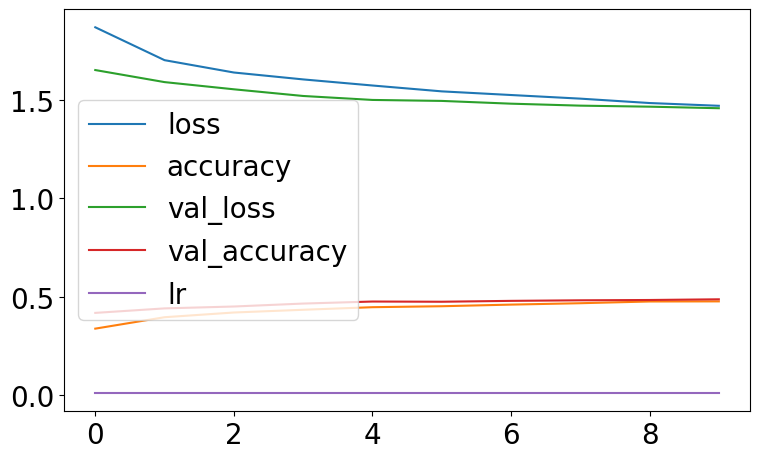

In [ ]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve.pdf')
plt.show()

# Testing the Best Model

Loading the saved model:

In [ ]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model/model.h5')

#Evaluating the model:

In [ ]:
loss, accuracy = model.evaluate(data_test)

625/625 [==============================] - 3s 4ms/step - loss: 1.4303 - accuracy: 0.4933
